In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
data=pd.read_csv(r'C:\Users\YASWANTH_B\Desktop\DataSets\crime.csv')

In [24]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [25]:
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

# Attribute description

__bold__IncidntNum__bold__:  Unique identity number of the crime.  
__bold__PdDistrict__bold__: The name of the Police Department District in which the crime occurred.  
__bold__Resolution__bold__: The resolution of the crime incident.  



# Data Exploration


&bull; Exploring the data

In [28]:
data.duplicated().sum() #checking for duplicate values

0

In [29]:
data.shape #checking for dimensions

(150500, 13)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


__There are 13 columns and 150500 data entries with no duplicate values__

In [31]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

&bull; We got one null value lets fill it with the most frequent value in that column using mode 

In [32]:
data['PdDistrict'].fillna(data['PdDistrict'].mode()[0],inplace=True)

In [33]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [34]:
data.isnull().sum().sum()

0

# Data Visualisation

In [35]:
plt.style.use('dark_background')

In [36]:
import seaborn as sns

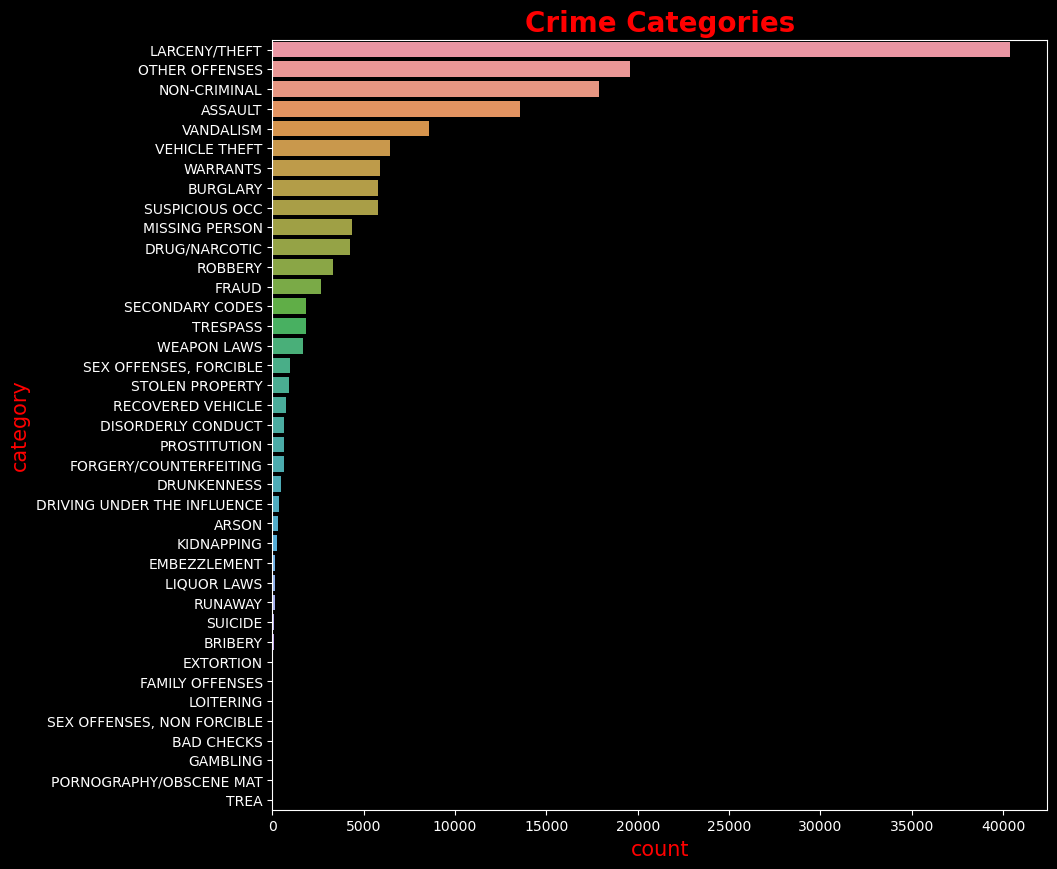

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Category'],order=data['Category'].value_counts().index)
plt.title('Crime Categories', fontweight='bold', fontsize=20,color='red')
plt.xlabel('count',fontsize=15,color='red')
plt.ylabel('category',fontsize=15,color='red')
plt.show()

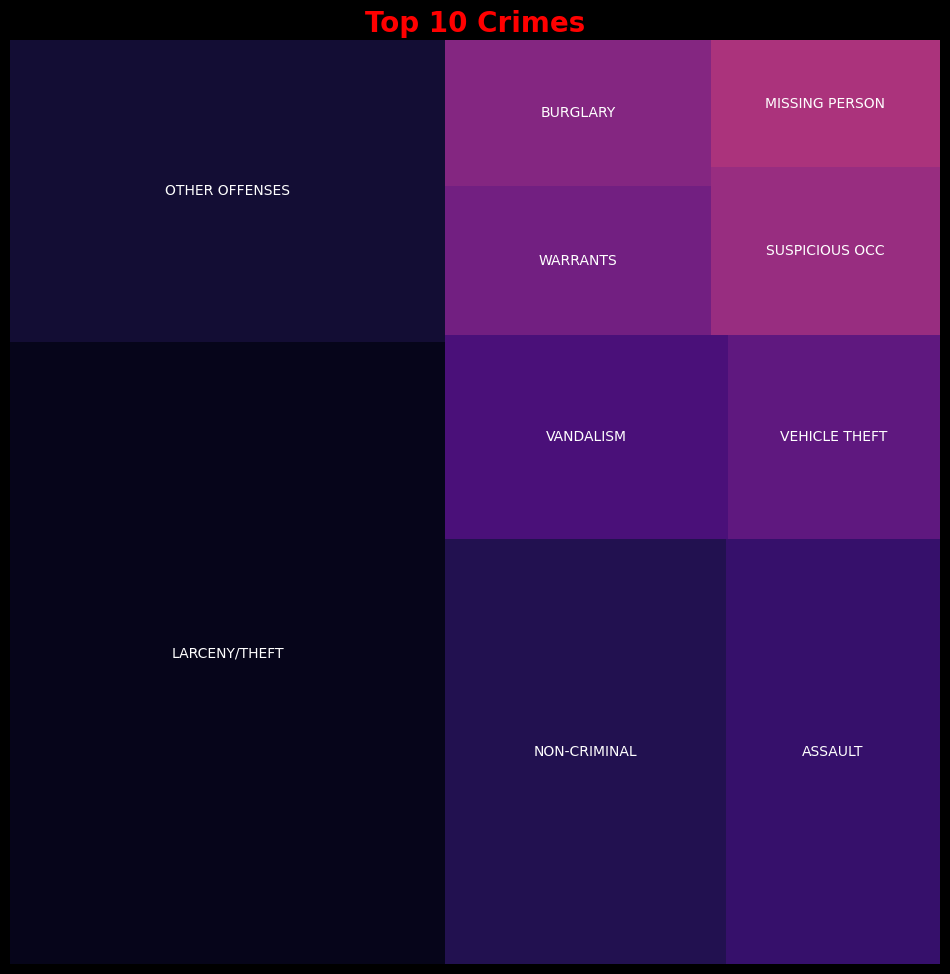

In [43]:
!pip install squarify
import squarify
y=data['Category'].value_counts().head(10)
plt.figure(figsize=(12,12))
squarify.plot(sizes=y.values,label=y.index,color=sns.color_palette('magma',20))
plt.rcParams.update({'font.size':20})
plt.axis('off')
plt.title('Top 10 Crimes', fontweight='bold', fontsize=20,color='red')
plt.show()

&bull; __Districtwise crime__

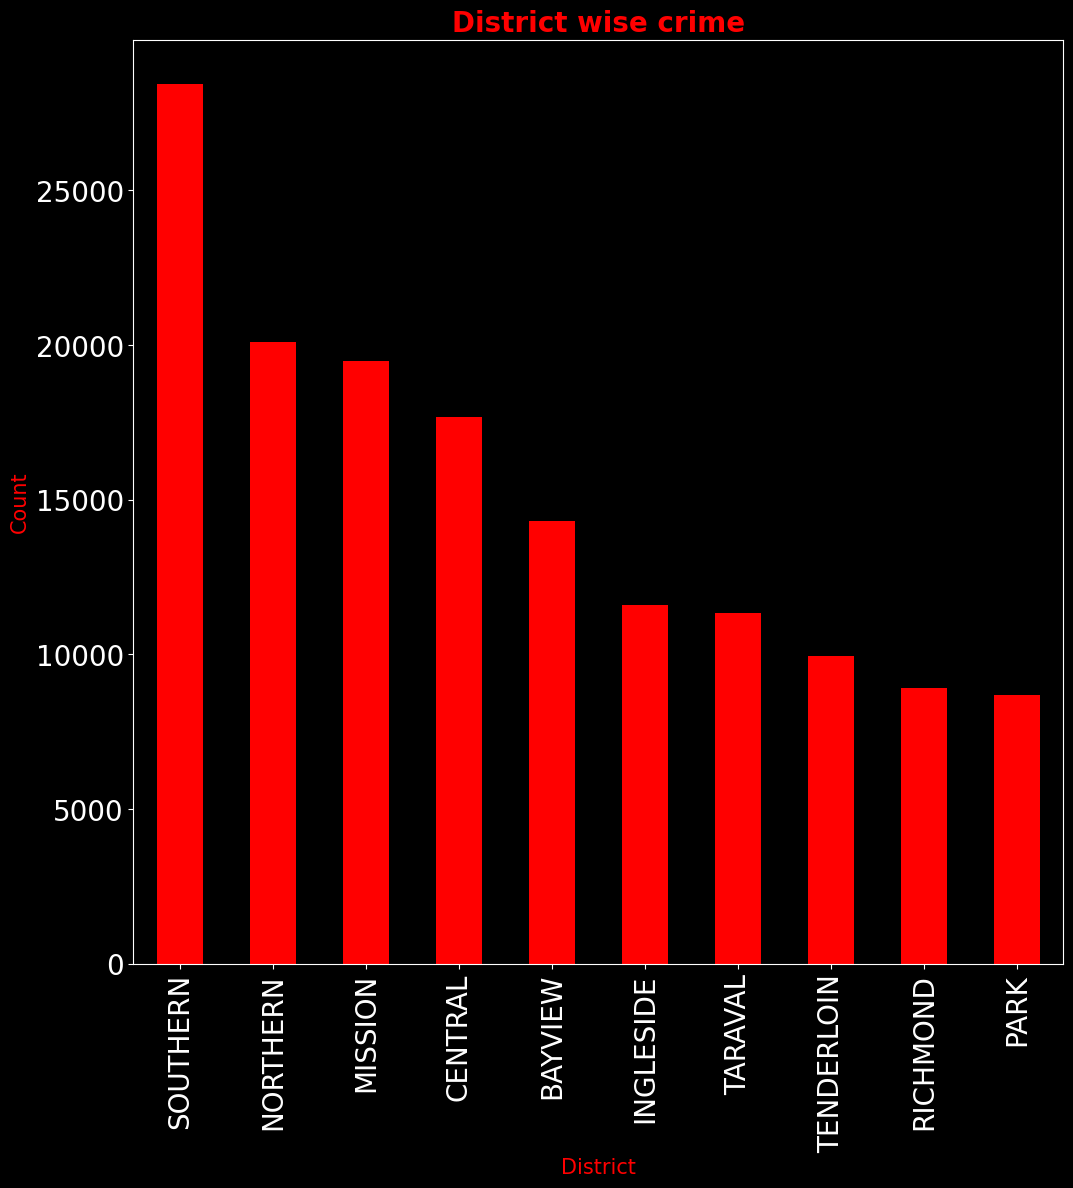

In [47]:
plt.figure(figsize=(12,12))
data['PdDistrict'].value_counts().plot(kind='bar',color='red')
plt.xlabel('District',fontsize=15,color='red')
plt.ylabel('Count',fontsize=15,color='red')
plt.title('District wise crime', fontweight='bold', fontsize=20,color='red')
plt.show()

&bull; __Addresses with more crimes reported__

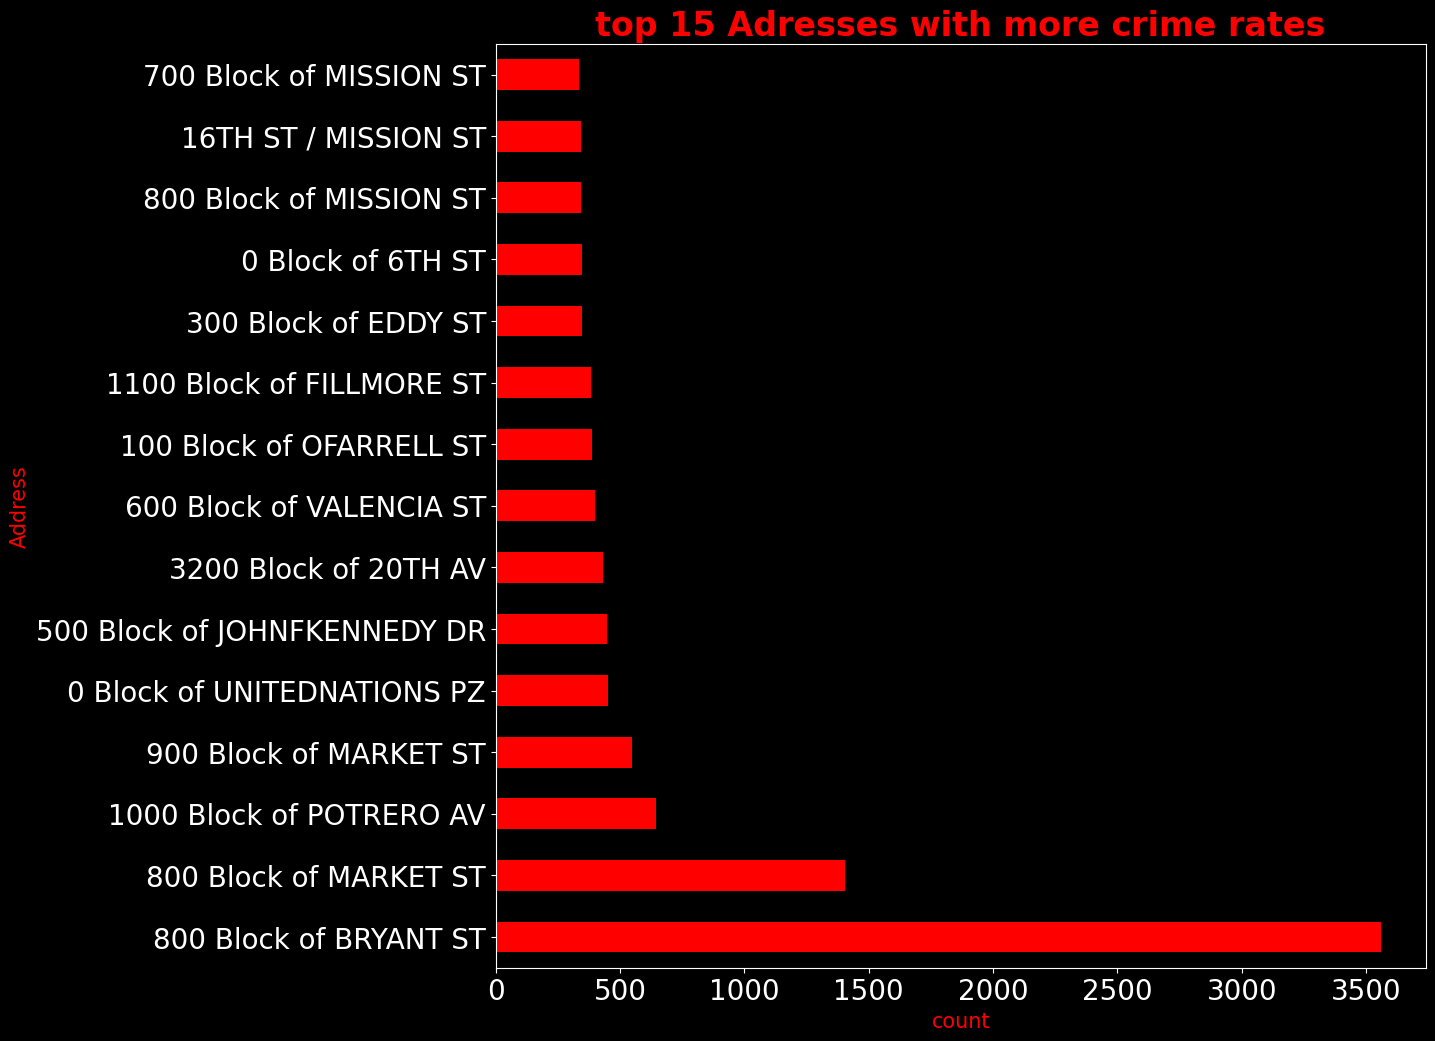

In [49]:
plt.figure(figsize=(12,12))
data['Address'].value_counts().head(15).plot(kind='barh',color='red')
plt.xlabel('count',fontsize=15,color='red')
plt.ylabel('Address',fontsize=15,color='red')
plt.title('top 15 Adresses with more crime rates',fontweight='bold',color='red')
plt.show()

&bull; Day of the week vs crimes reported

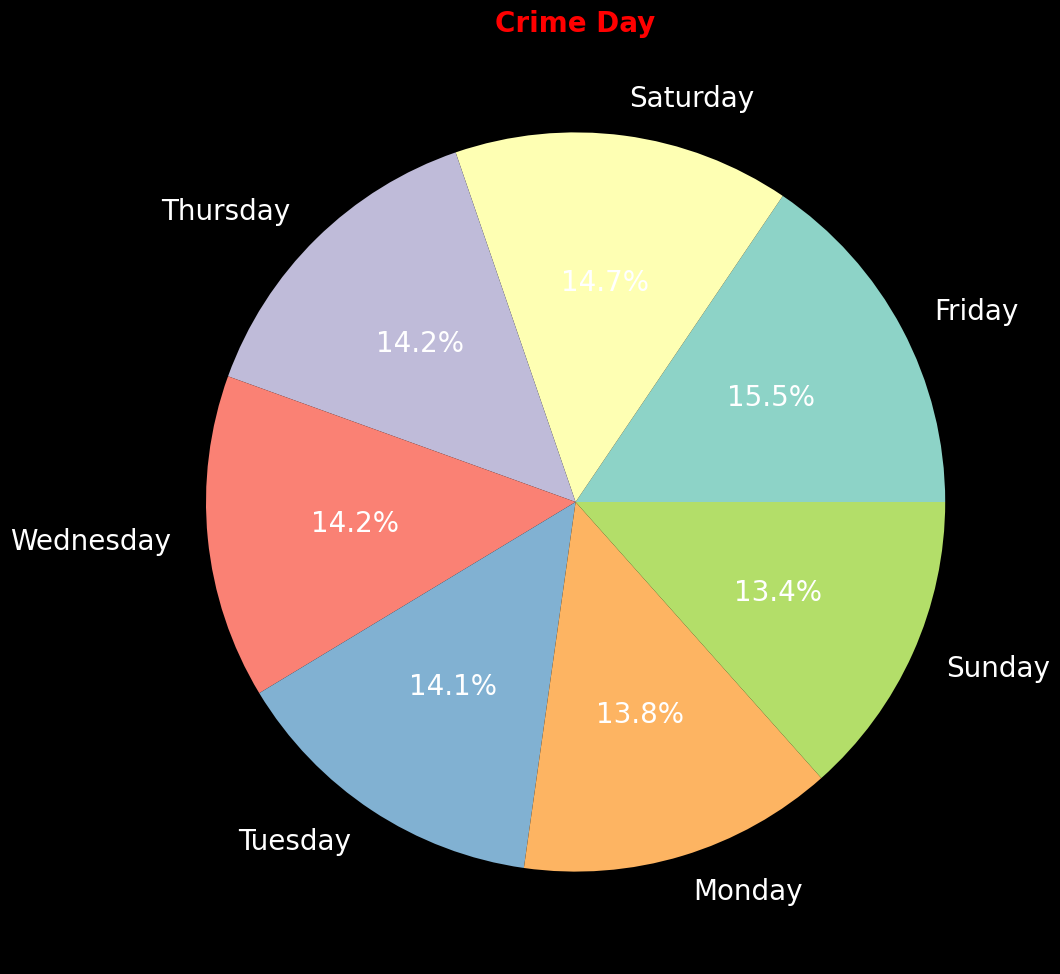

In [56]:
plt.figure(figsize=(12,12))
data['DayOfWeek'].value_counts().plot.pie(autopct='%1.1f%%')#,shadow=True,explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05))
plt.title('Crime Day', fontweight='bold', fontsize=20,color='red')
plt.ylabel('')
plt.show()

&bull; Month of the year vs crime reported

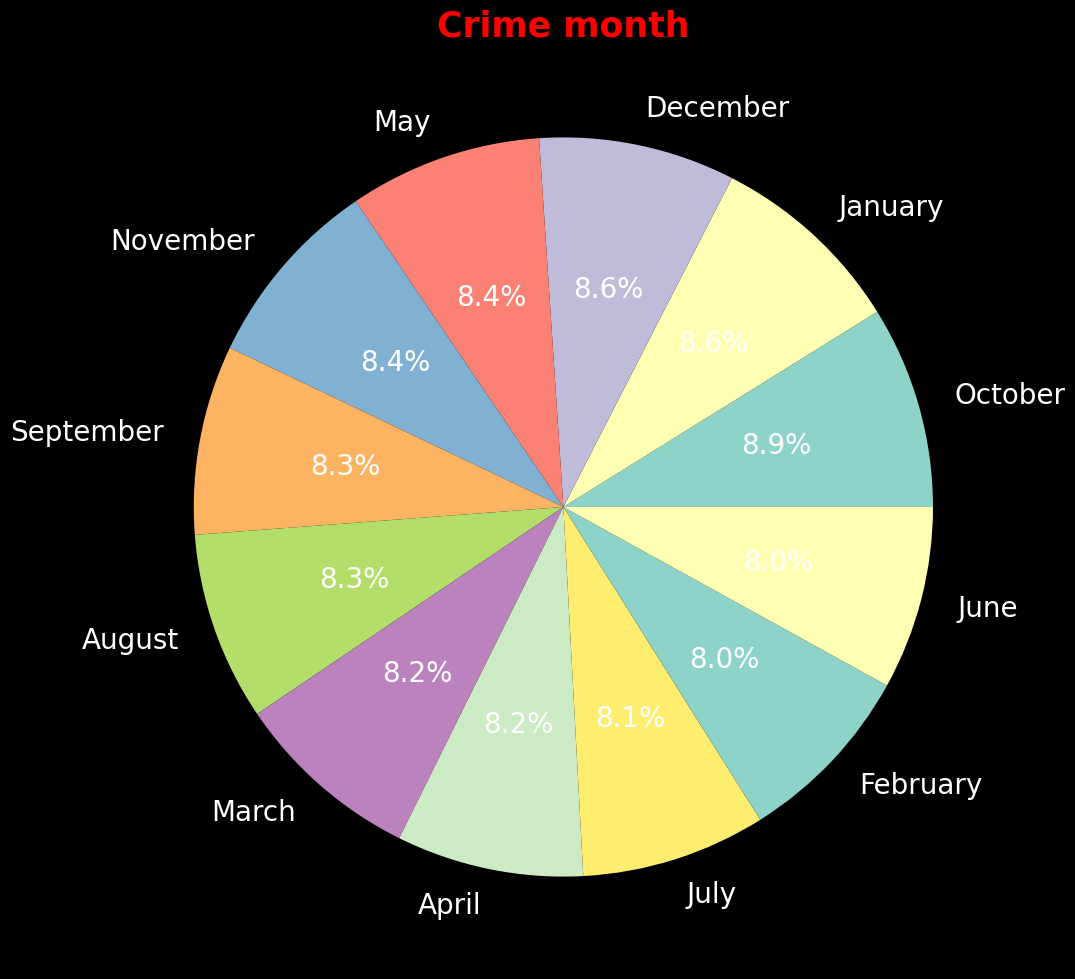

In [59]:
plt.figure(figsize=(12,12))
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
# Define a dictionary to map numeric values to month names
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Replace the numeric values in the 'Month' column with month names
data['Month'] = data['Month'].replace(month_mapping)

data['Month'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime month',fontsize=25,fontweight='bold',color='red')
plt.ylabel(' ')
plt.show()


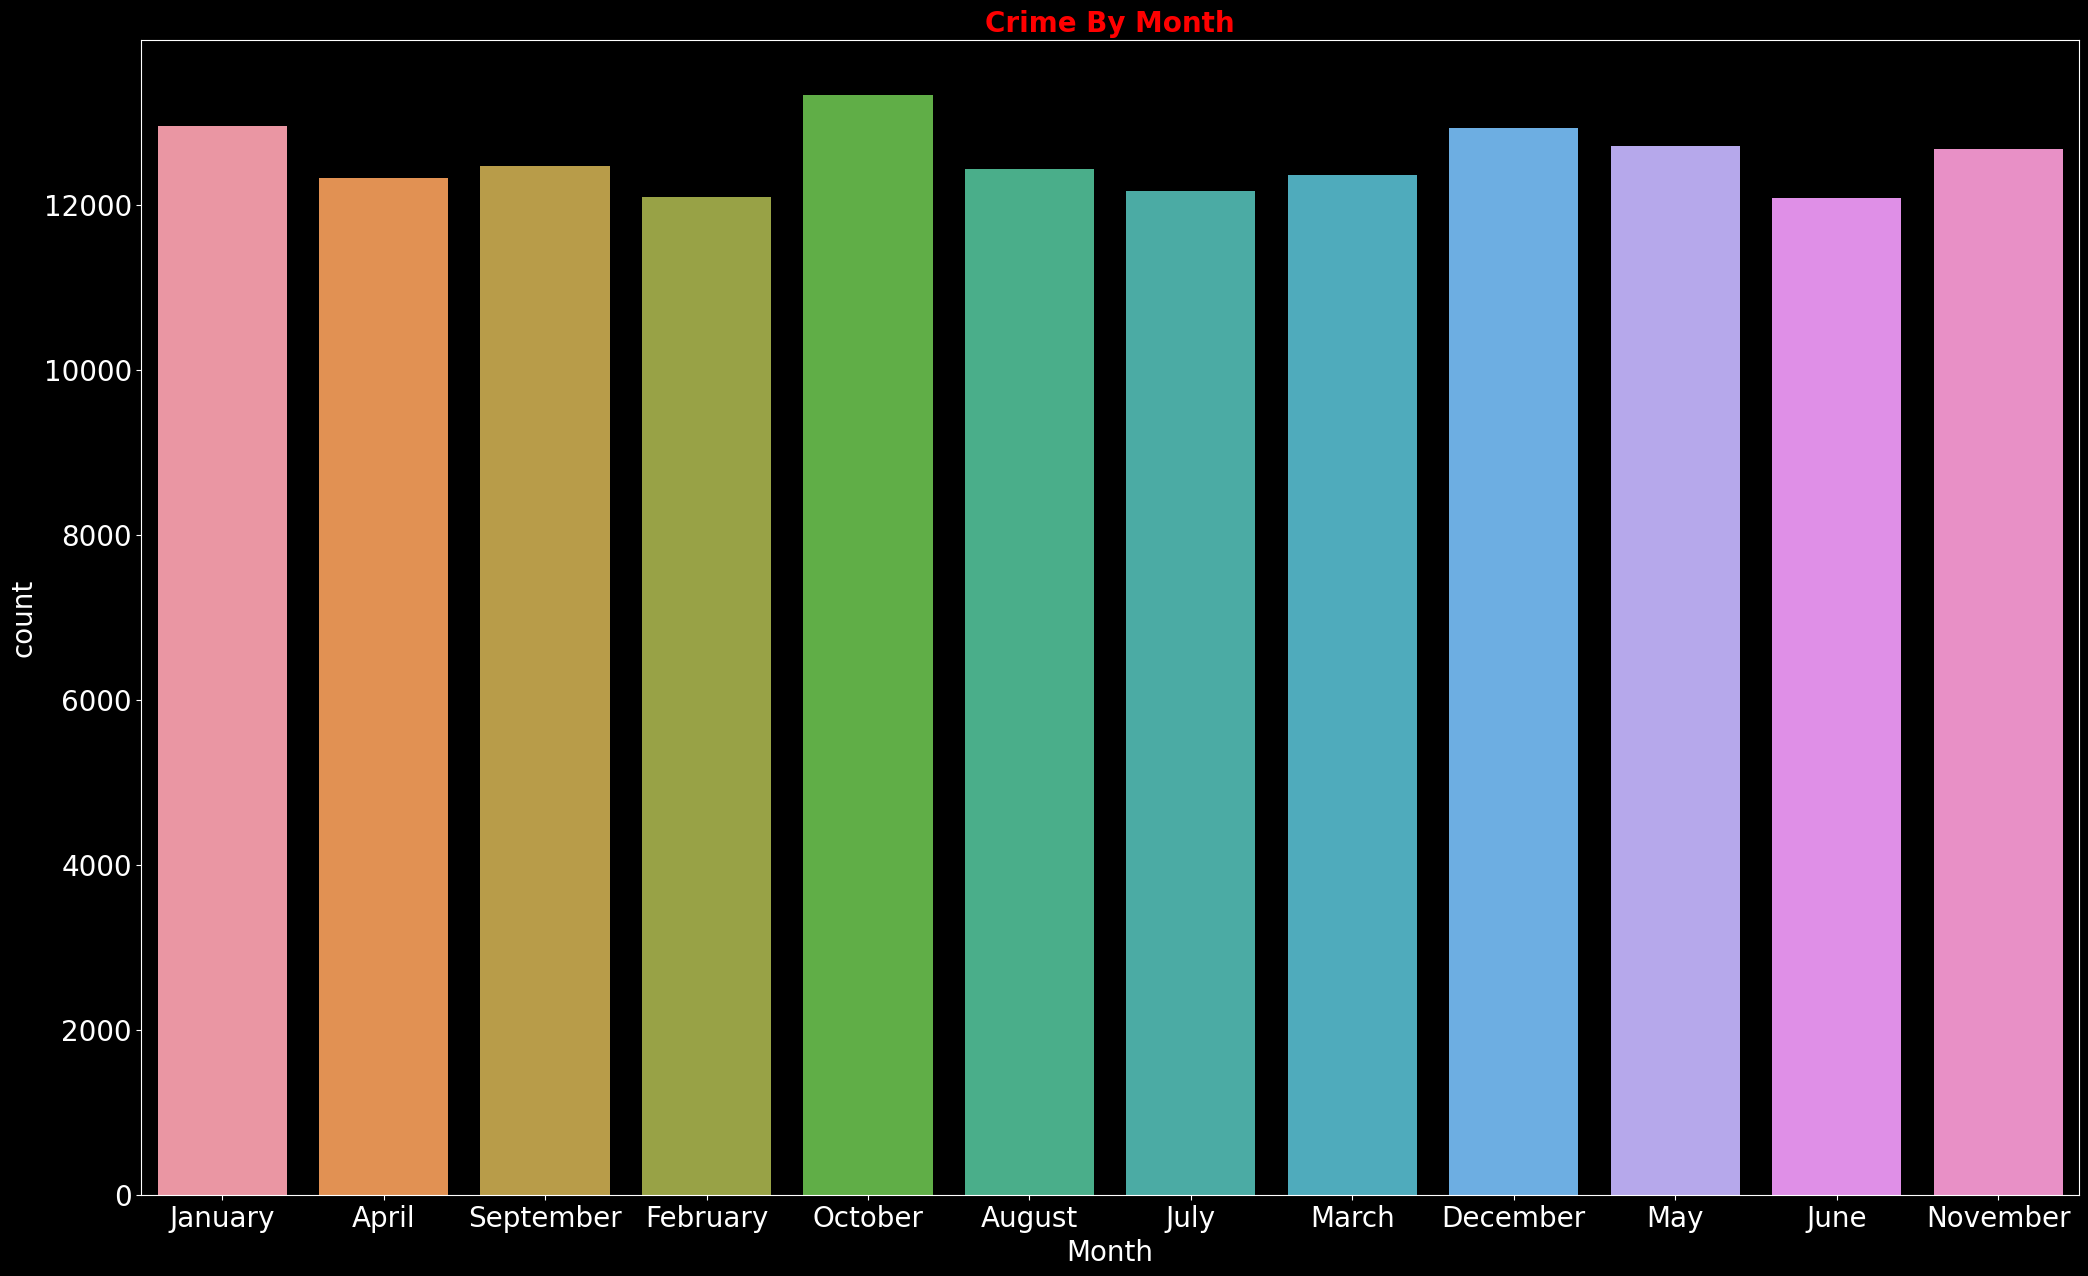

In [68]:
plt.figure(figsize=(25,15))
sns.countplot(x='Month',data=data)
plt.title('Crime By Month', fontweight='bold', fontsize=20,color='red')
plt.show()

&bull; __Time VS Crimes reported__

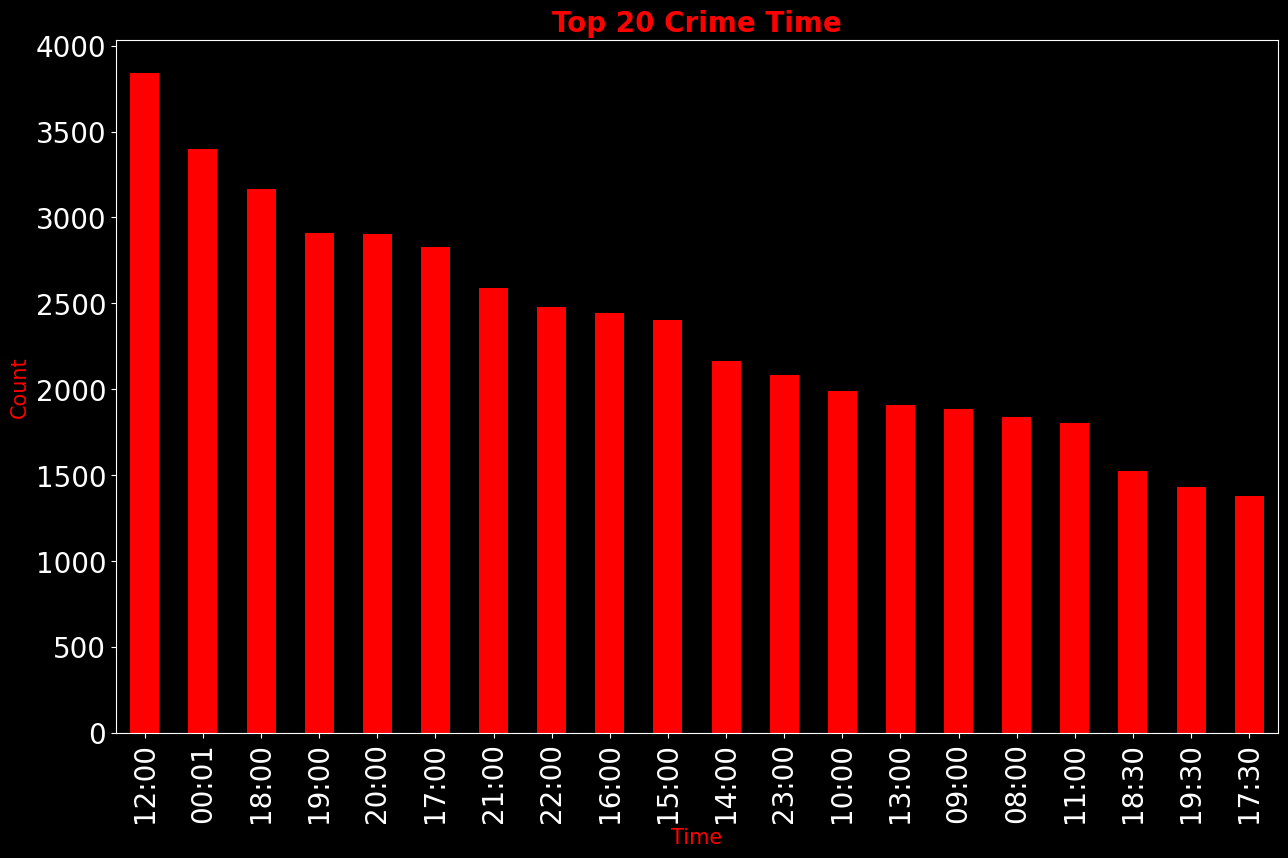

In [70]:
plt.figure(figsize=(15,9))
data['Time'].value_counts().head(20).plot(kind='bar',color='red')
plt.xlabel('Time', fontsize=15, color='red')
plt.ylabel('Count', fontsize=15, color='red')
plt.title('Top 20 Crime Time', fontweight='bold', fontsize=20,color='red')
plt.show()

&bull; District VS Category of crime

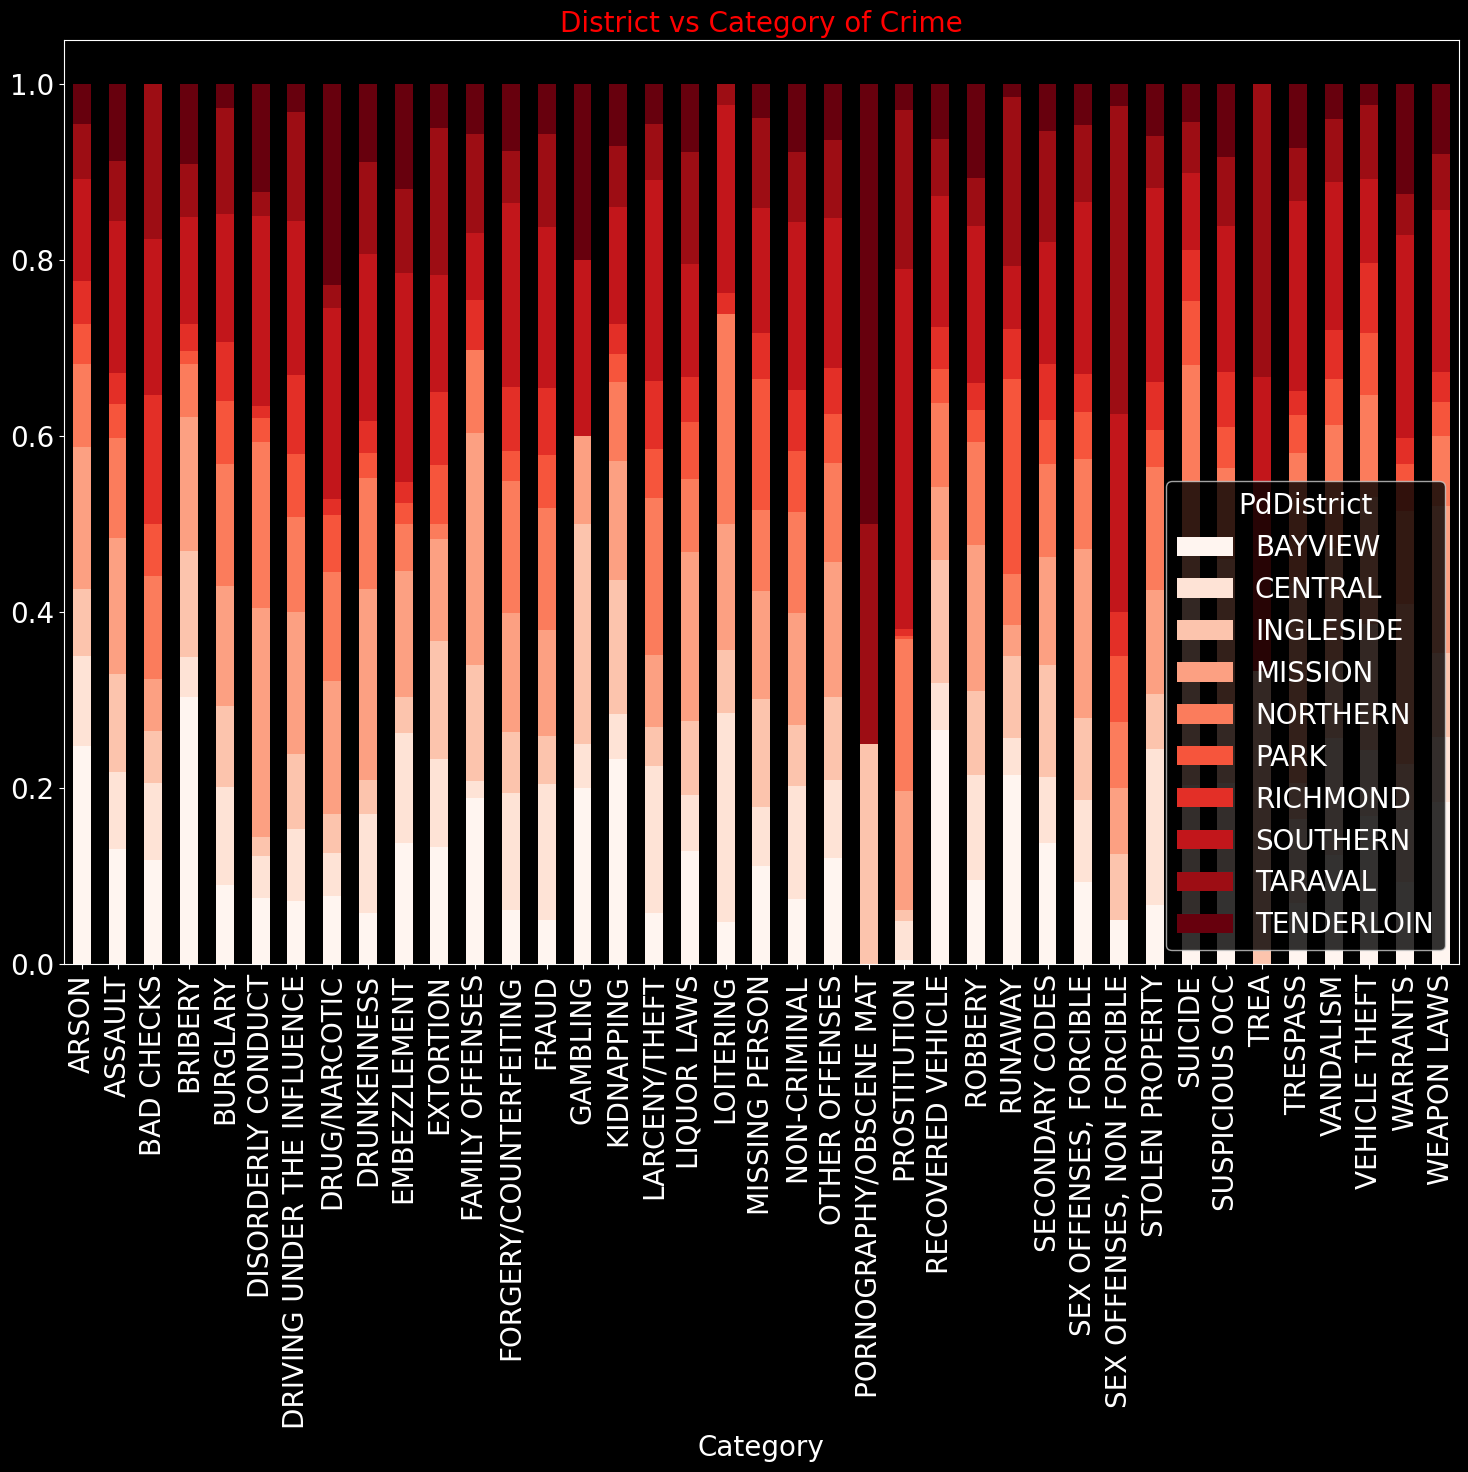

In [86]:
df=data.groupby(['PdDistrict','Category']).size().reset_index(name='Count')
df=df.pivot(index='PdDistrict',columns='Category',values='Count')
df = pd.crosstab(data['Category'], data['PdDistrict'])
color = plt.cm.Reds(np.linspace(0, 1, 10))
df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20, color = 'red')
plt.show()



In [89]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120,January
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,January
2,141059263,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,April
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,January
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,January


In [91]:
data['Resolution'].value_counts()

NONE                                      107780
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

In [100]:
apd = data[(data['Resolution'] == 'ARREST, BOOKED') | (data['Resolution'] == 'ARREST, CITED')].groupby('PdDistrict').size().reset_index(name='Arrests')
apd.head(10)

,PdDistrict,Arrests
0,BAYVIEW,3914
1,CENTRAL,3585
2,INGLESIDE,2768
3,MISSION,6559
4,NORTHERN,4358
5,PARK,1960
6,RICHMOND,1421
7,SOUTHERN,8111
8,TARAVAL,2626
9,TENDERLOIN,4258


&bull; Arrests per District

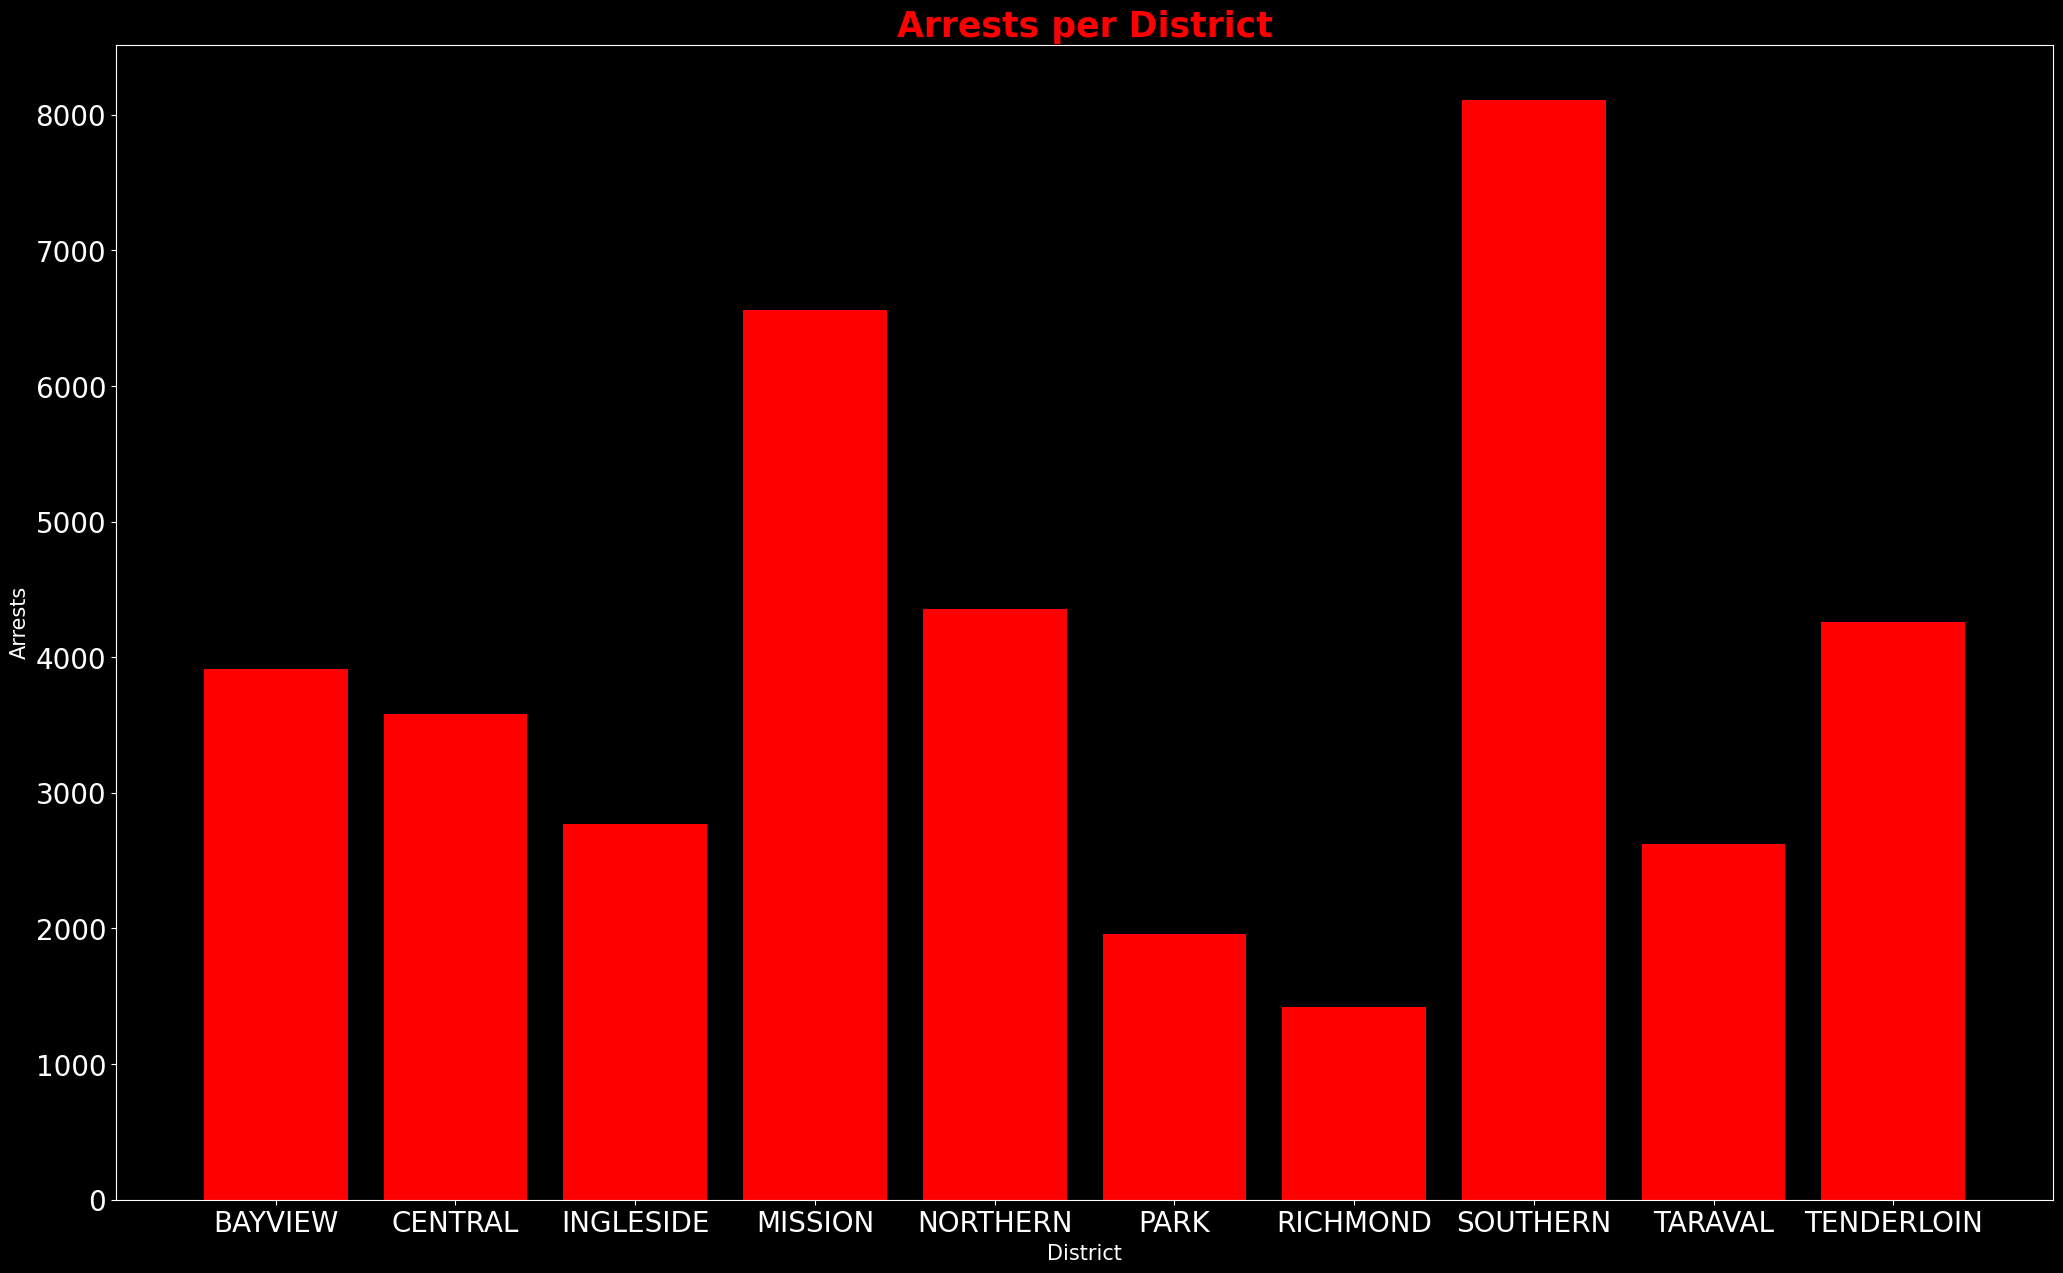

In [103]:
plt.figure(figsize=(25,15))
plt.title('Arrests per District',fontweight='bold',fontsize=25,color='red')
plt.bar(apd['PdDistrict'],apd['Arrests'],color='red')
plt.xlabel('District',fontsize=15)
plt.ylabel('Arrests',fontsize=15)
plt.show()